In [1]:
import Pkg
Pkg.add("Revise")
Pkg.add("IonSim")
Pkg.add("QuantumOptics")
Pkg.add("StochasticDiffEq")
Pkg.add("DSP")
using PyPlot
using Revise
using IonSim
using QuantumOptics: timeevolution, stochastic, Basis

   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`


Ket(dim=2)
  basis: ⁴⁰Ca
 1.0 + 0.0im
 0.0 + 0.0imKet(dim=11)
  basis: VibrationalMode(ν=1.0e6, axis=ẑ, N=10)
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

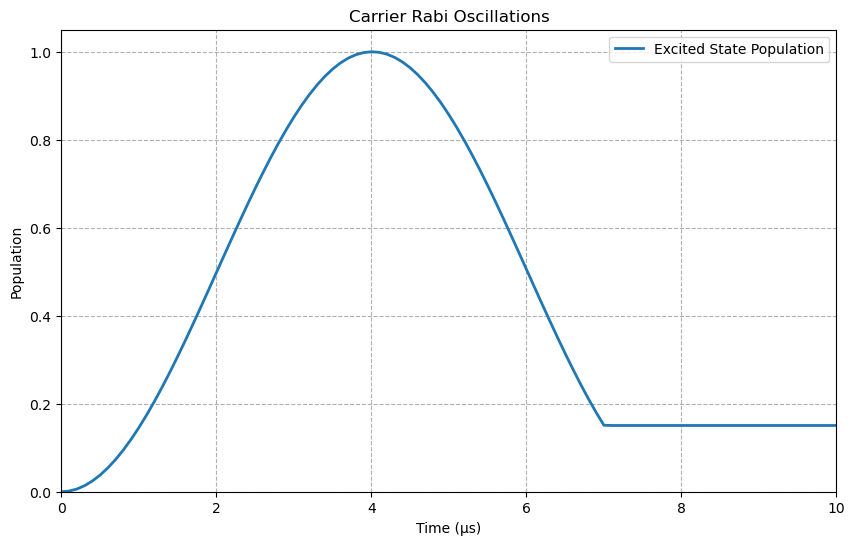

In [111]:
C = Ca40([("S1/2", -1/2, "g"),("D5/2", -1/2, "e")])
# Create aliases for the qubit states for easier access
#set_sublevel_alias!(C, Dict("g" => ("S1/2", -1/2), "e" => ("D5/2", -1/2)))

# Define the trap configuration. We'll model a single ion in a linear chain
# with a 1 MHz axial motional frequency.
chain = LinearChain(
    ions=[C],
    comfrequencies=(x=3e6, y=3e6, z=1e6),
    selectedmodes=(;z=[1]) # We only consider the axial mode of motion
)

# Define the laser that will drive the transition
L = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T = Chamber(
    iontrap=chain,
    B=4e-4,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L]
)

polarization!(L, (x̂ - ẑ)/√2)
wavevector!(L, (x̂ + ẑ)/√2);
wavelength_from_transition!(L, C, ("g", "e"), T)
intensity_from_pitime!(L, 4e-6, C, ("g", "e"), T);
function tmp(t)
    if(t<=7)
        return 1.030939867952202e6
    else
        return 0.0
    end

end
intensity!(L, tmp)
h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);

ion = ions(T)[1]

ψ0_ion_1 = ion["g"]
ψ0_ion_2 = ion[("S1/2", -1/2)]
ψ0_ion_3 = ionstate(ion, "g")

print(ψ0_ion_1)
mode = modes(T)[1]

ψ0_mode_1 = mode[0]
ψ0_mode_2 = fockstate(mode, 0)
ψ0_mode_3 = groundstate(mode)

print(ψ0_mode_1)
ψ₀ = ion["g"] ⊗ mode[0];

tspan = 0:0.1:10
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)

# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)

# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
xlim(0, 10)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()



In [112]:
function tmp(t)
    if(t<=2)
        return 1.030939867952202e6
    elseif(t>=18)
        return 1.030939867952202e6
    else
        return 0.0
    end

end
intensity!(L, tmp)
h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);

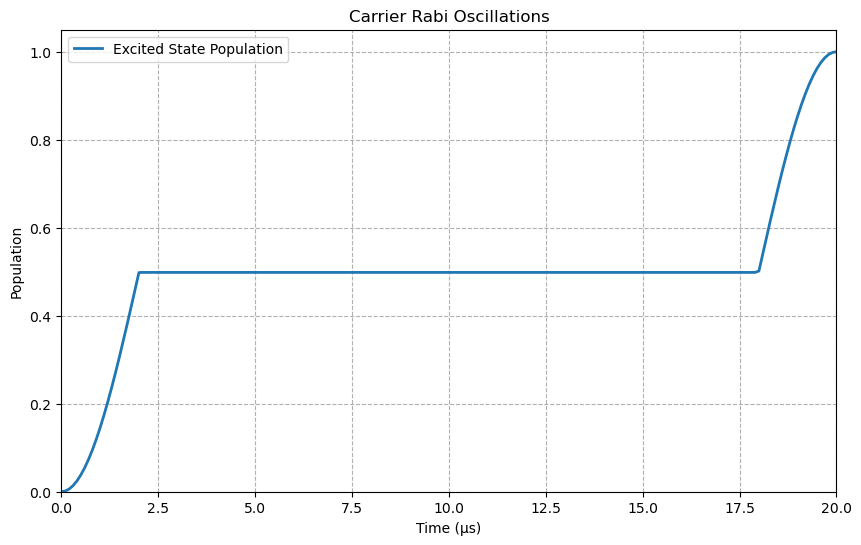

In [113]:
tspan = 0:0.1:20
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)

# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)

# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()

In [114]:
print(L)

λ: 7.291469960190796e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 0.0 ⋅ 2π


In [115]:
phase!(L, pi)
print(L)

λ: 7.291469960190796e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 0.5 ⋅ 2π


In [116]:


function pulse(T:: Chamber , tspan, pitime)
    # Define the laser that will drive the transition
    L = T.lasers[1]

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    
    pi2_time = pitime*1e6/2

    res_intensity = intensity_from_pitime(L, pitime, T.iontrap.ions[1], ("g", "e"), T)

    function intensity_funtion(t)
    if(t<=pi2_time)
        return res_intensity
    elseif(t>=tspan[end] - pi2_time)
        return res_intensity
    else
        return 0.0
    end

    end
    intensity!(L, intensity_funtion)

    function phase_funtion(t)
        if(t<=pi2_time)
            return 2*pi
        elseif(t>=tspan[end] - pi2_time)
            return pi
        else
            return 0.0
        end
    end

    phase!(L, phase_funtion)
    h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
    return h
end




# phase!(L, phase_funtion)
# h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);

pulse (generic function with 1 method)

λ: 7.291469960190796e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π


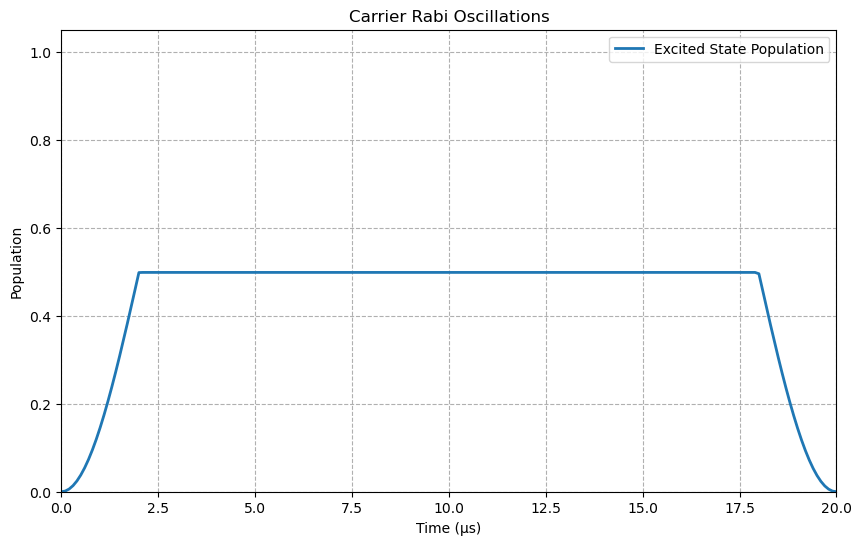

In [117]:
tspan = 0:0.1:20
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
h = pulse(T, tspan, 4e-6)
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)


# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)
figure(figsize=(10, 6))
plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()

print(L)

λ: 7.291469960190796e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469960190796e-7 m
Δ: 250000.0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469960190796e-7 m
Δ: 150000.0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π


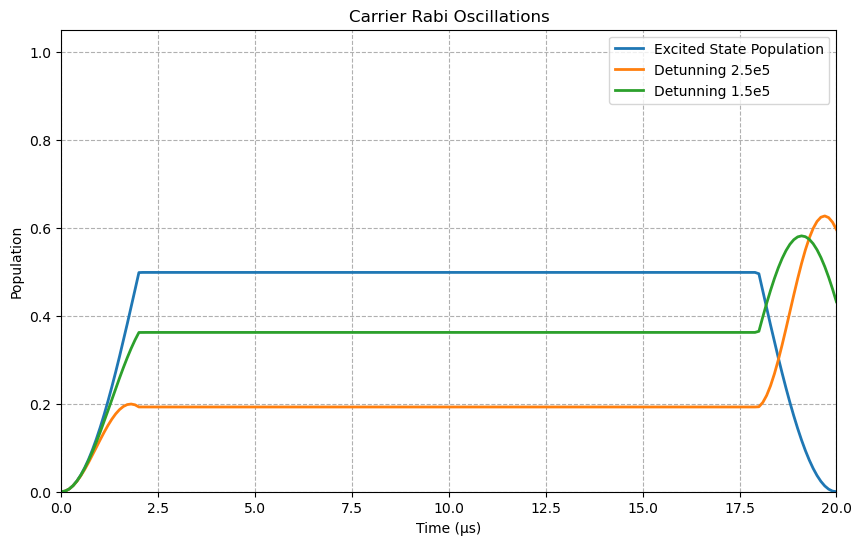

In [118]:
tspan = 0:0.1:20
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
h = pulse(T, tspan, 4e-6)
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)


# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)
print(L)



L1 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T1 = Chamber(
    iontrap=chain,
    B=4e-4,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L1]
)
polarization!(L1, (x̂ - ẑ)/√2)
wavevector!(L1, (x̂ + ẑ)/√2);
wavelength_from_transition!(L1, C, ("g", "e"), T1)
detuning!(L1, 2.5e5)
h1 = pulse(T1, tspan, 4e-6)
tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
excited_pop1 = expect(ionprojector(T1, "e"), sol1)
print(L1)


L2 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T2 = Chamber(
    iontrap=chain,
    B=4e-4,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L2]
)
polarization!(L2, (x̂ - ẑ)/√2)
wavevector!(L2, (x̂ + ẑ)/√2);
wavelength_from_transition!(L2, C, ("g", "e"), T2)
detuning!(L2, 1.5e5)

h2 = pulse(T2, tspan, 4e-6)
tout2, sol2 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h2)

excited_pop2 = expect(ionprojector(T2, "e"), sol2)

print(L2)


# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
plot(tout1, real.(excited_pop1), label="Detunning 2.5e5", color="C1", linewidth=2)
plot(tout2, real.(excited_pop2), label="Detunning 1.5e5", color="C2", linewidth=2)
xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()

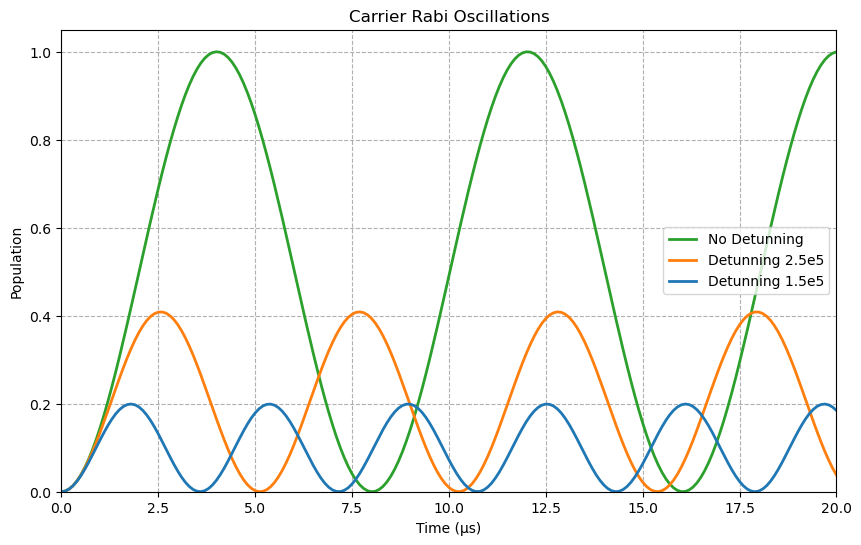

In [ ]:
L = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T = Chamber(
    iontrap=chain,
    B=4e-4,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L]
)

polarization!(L, (x̂ - ẑ)/√2)
wavevector!(L, (x̂ + ẑ)/√2);
wavelength_from_transition!(L, C, ("g", "e"), T)
intensity_from_pitime!(L, 4e-6, C, ("g", "e"), T);

h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
excited_pop = expect(ionprojector(T, "e"), sol)



detuning!(L, 1.5e5)

h1 = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)

detuning!(L, 2.5e5)
h2 = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
tout2, sol2 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h2)




excited_pop1 = expect(ionprojector(T, "e"), sol1)
excited_pop2 = expect(ionprojector(T, "e"), sol2)   


tspan = 0:0.1:20
# Create the plot using PyPlot
figure(figsize=(10, 6))

plot(tout, real.(excited_pop), label="No Detunning", color="C2", linewidth=2)
plot(tout1, real.(excited_pop1), label="Detunning 2.5e5", color="C1", linewidth=2)
plot(tout2, real.(excited_pop2), label="Detunning 1.5e5", color="C0", linewidth=2)
xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()

In [146]:
function print_detuning(L, detunings...)
    L = Laser()

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    T = Chamber(
        iontrap=chain,
        B=4e-4,              # Magnetic field in Tesla
        #δB = 0.1,
        Bhat=ẑ,              # Magnetic field direction
        lasers=[L]
    )

    polarization!(L, (x̂ - ẑ)/√2)
    wavevector!(L, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L, C, ("g", "e"), T)
    intensity_from_pitime!(L, 4e-6, C, ("g", "e"), T);
    tspan = 0:0.1:20

    # Create the plot using PyPlot
    figure(figsize=(10, 6))
    count = 0
    for detuning_value in detunings

        
        detuning!(L, detuning_value)

        h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
        tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
        excited_pop = expect(ionprojector(T, "e"), sol)
        plot(tout, real.(excited_pop), label= "$(detuning_value) Detunning", color="C$(count)", linewidth=2)
        count += 1
        
    end




    xlim(0, 20)
    xlabel("Time (μs)")
    ylabel("Population")
    title("Carrier Rabi Oscillations")
    ylim(0, 1.05)
    grid(true, linestyle="--")
    legend()
    show()
end

print_detuning (generic function with 2 methods)

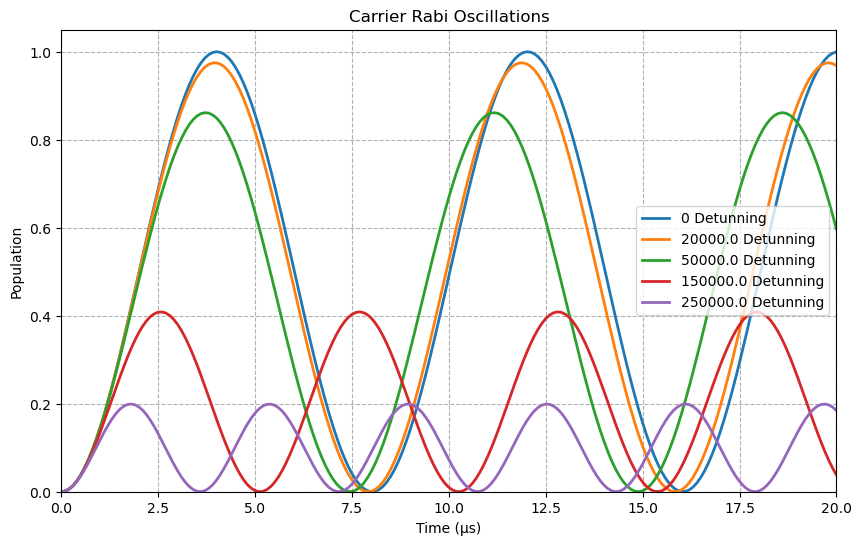

In [149]:
print_detuning(L, 0, 0.2e5, 0.5e5, 1.5e5, 2.5e5)